In [1]:
import numpy as np
from numpy import linalg as LA
import scipy
import itertools as it

In [2]:
def ek(k,dim):
    ek = np.zeros(dim)
    ek[k]=1
    return ek

In [3]:
def grad_neumeric(f,values,h=0.00001):
    dim = len(values)
    derviative = lambda val,pos: (f(*(val+h*pos))-f(*val))/h
    return np.array([derviative(values,ek(i,dim))  for i in range(dim)])

In [4]:
test_f = lambda x,y,z: x**2+y**2+z**2
test_val = np.array([1,2,3])
grad_approx = grad_neumeric(test_f,test_val)
grad_approx

array([2.00001, 4.00001, 6.00001])

In [5]:
def hassian_neumeric(f,values,h=0.00001):
    der_hessian_at_val = []
    der_hessian = lambda vec, eki,ekj: (f(*(vec+h*ekj+h*eki))-f(*(vec+h*ekj))-f(*(vec+h*eki))+f(*vec))/h**2 
    dim = len(values)
    for i in range(dim):
       for j in range(dim):
           val = (der_hessian(values,ek(i,dim),ek(j,dim)))
           der_hessian_at_val.append(val)
    der_hessian_at_val = np.array(der_hessian_at_val).reshape(dim,dim)
    return der_hessian_at_val

In [6]:
test_hf = lambda x,y: x**2+y**2
test_hval = np.array([1,2])
print(grad_neumeric(test_hf,test_hval))
print(hassian_neumeric(test_hf,test_hval))

[2.00001 4.00001]
[[2.00000017 0.        ]
 [0.         2.00000017]]


In [7]:
def gradient_at_val(f,gradient_f,values):
    grad = []
    if gradient_f is None:
        return np.array(grad_neumeric(f,values))
    for function in gradient_f:
        gradient = function(*values)
        grad.append(gradient)
#     print('gradient--->',grad)
    return np.array(grad)

In [8]:
def hassian_at_val(f,gradient2d_f,values):
    hassian = []
    if gradient2d_f is None:
        return hassian_neumeric(f,values)
    for gradient_f in gradient2d_f:
        grad = gradient_at_val(f,gradient_f,values)
        hassian.append(grad)
    return np.array(hassian)

In [9]:
def gradient_direction(function,gradient_f,gradient2d_f,values,newton_direction=False):
    dk = []
    grad = gradient_at_val(function,gradient_f,values)
    if newton_direction:
        dk = - np.dot(LA.inv(hassian_at_val(function,gradient2d_f,values)), grad)
        if - np.dot(grad.T,dk)/(LA.norm(grad)*LA.norm(dk)) < 0.05:
            dk = - grad
    else:
        dk = - grad
    return dk
        

In [10]:
def descent_direction(f,gradient_f,values):
    grad = gradient_at_val(f,gradient_f,values)
    p =  - (LA.norm(grad))**2
    return p

In [11]:
def armijo_step_algorithm(f,gradient_f,dk,values,delta):
    ro = 1
    grad_at_values = gradient_at_val(f,gradient_f,values).T
    while f(*(values+ro*dk)) <= f(*values)+ro*delta*np.dot(grad_at_values,dk):
        ro *= 2
    
    while f(*(values+ro*dk)) > f(*values)+ro*delta*np.dot(grad_at_values,dk):
        ro /= 2
    return ro

In [12]:
# Bazaray shetty function
# f = lambda x,y: (x-2)**4 + (x-2*y)**2
# dfx = lambda x,y: 4*(x-2)**3+2*(x-2*y)
# dfy = lambda x,y: -4*(x-2*y)

# dfx11 = lambda x,y: 12*(x-2)**2+2
# dfx12 = lambda x,y: -4

# dfx21 = lambda x,y: -4
# dfx22 = lambda x,y: 8

In [13]:
# rosenbrook function
f = lambda x,y : 100*(y-x*x)**2 + (1-x)**2
dfx = lambda x,y: -400*x*(y-x*x) + 2*x - 2
dfy = lambda x,y: 200*(y-x*x)

dfx11 = lambda x,y: -400*(y-3*x**2)+2
dfx12 = lambda x,y: -400*x

dfx21 = lambda x,y: -400*x
dfx22 = lambda x,y: 200

In [14]:
print(f'dfx numeric: {grad_neumeric(f,[1,2])} ')
print(f'dfx: {dfx(1,2)}  dfy:{dfy(1,2)}')

dfx numeric: [-399.99798996  200.001     ] 
dfx: -400  dfy:200


In [15]:
print(f'dfx numeric: {hassian_neumeric(f,[1,2])} ')
print(f'dfx11: {dfx11(1,2)}  dfx12:{dfx12(1,2)} dfx21:{dfx21(1,2)} dfx22:{dfx22(1,2)}')

dfx numeric: [[ 402.02365881 -400.00216472]
 [-400.00216472  199.99987444]] 
dfx11: 402  dfx12:-400 dfx21:-400 dfx22:200


In [16]:


negative_grad = gradient_at_val(np.array([dfx,dfy]),np.array([1,2]))
# negative_grad = np.array([-400,-200])
delta = 10e-4
step_size = armijo_step_algorithm(f,np.array([dfx,dfy]),negative_grad,np.array([1,2]),delta)
print(step_size)

TypeError: TypeError: gradient_at_val() missing 1 required positional argument: 'values'

In [17]:
from numpy import linalg as LA
def general_descent(iteration,function,gradient_f,gradient2d_f,initial,use_newton=True):
    xk = initial
    counter = 0
    xk1 = 0
    delta = 10**(-3)
    while counter <=iteration:
        print(LA.norm(gradient_at_val(function,gradient_f,xk)))
        dk = gradient_direction(function,gradient_f,gradient2d_f,xk,newton_direction=use_newton)
        step_size = armijo_step_algorithm(function,gradient_f,dk,xk,delta)
        xk1 = xk + step_size*dk
        xk = xk1
        print('xk1 at iterate: {}--->: {}'.format(counter,xk1))
        print('dk at iterate: {}--->: {}'.format(counter,dk))
        print('step_size at iterate: {}--->: {}'.format(counter,step_size))
        counter += 1
        if LA.norm(gradient_at_val(function,gradient_f,xk))<=0.0001:
            break
    return xk1

In [18]:
general_descent(10000,f,np.array([dfx,dfy]),np.array([[dfx11,dfx12],[dfx21,dfx22]]),np.array([0,10]),use_newton=True)

2000.00099999975
xk1 at iterate: 0--->: [-0.00050025  0.        ]
dk at iterate: 0--->: [-5.00250125e-04 -1.00000000e+01]
step_size at iterate: 0--->: 1.0
2.0010005509511384
xk1 at iterate: 1--->: [ 0.24961229 -0.00025018]
dk at iterate: 1--->: [ 1.00045018 -0.0010007 ]
step_size at iterate: 1--->: 0.25
13.380924214428214
xk1 at iterate: 2--->: [0.36068791 0.18031445]
dk at iterate: 2--->: [0.05553781 0.09028231]
step_size at iterate: 2--->: 2.0
13.173232480119408
xk1 at iterate: 3--->: [0.28999676 0.07910088]
dk at iterate: 3--->: [-0.07069115 -0.10121357]
step_size at iterate: 3--->: 1.0
1.3057778332437744
xk1 at iterate: 4--->: [0.4675466  0.18457726]
dk at iterate: 4--->: [0.35509967 0.21095275]
step_size at iterate: 4--->: 0.5
8.623783051744896
xk1 at iterate: 5--->: [1.01333688 0.96712255]
dk at iterate: 5--->: [0.06822378 0.09781816]
step_size at iterate: 5--->: 8.0
27.0209572421879
xk1 at iterate: 6--->: [1.01230667 1.02476374]
dk at iterate: 6--->: [-0.00103021  0.05764119]
st

array([1.00000008, 1.00000015])

In [19]:
general_descent(20000,f,None,None,np.array([0,10]),use_newton=True)

2000.002020031175
xk1 at iterate: 0--->: [-0.00045975 -0.0001108 ]
dk at iterate: 0--->: [-4.59748716e-04 -1.00001108e+01]
step_size at iterate: 0--->: 1.0
2.00104201066335
xk1 at iterate: 1--->: [ 0.24422276 -0.00030683]
dk at iterate: 1--->: [ 9.78730019e-01 -7.84141700e-04]
step_size at iterate: 1--->: 0.25
12.752509494981512
xk1 at iterate: 2--->: [0.36050863 0.17638682]
dk at iterate: 2--->: [0.05814294 0.08834682]
step_size at iterate: 2--->: 2.0
12.23820190994563
xk1 at iterate: 3--->: [0.28336197 0.07433663]
dk at iterate: 3--->: [-0.07714666 -0.10205019]
step_size at iterate: 3--->: 1.0
1.4111465399688343
xk1 at iterate: 4--->: [0.44659652 0.16982337]
dk at iterate: 4--->: [0.3264691  0.19097349]
step_size at iterate: 4--->: 0.5
7.253866454696142
xk1 at iterate: 5--->: [0.76559536 0.57323441]
dk at iterate: 5--->: [0.07974971 0.10085276]
step_size at iterate: 5--->: 4.0
4.335396654561965
xk1 at iterate: 6--->: [0.89522705 0.79752025]
dk at iterate: 6--->: [0.06481584 0.1121429

array([0.99701103, 0.99402599])

In [20]:
import matplotlib.pyplot as plt
x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
fx = f(x,y)

In [21]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def draw_function(x,y,f):
    fig = plt.figure(figsize=(20, 10))
    ax = plt.gca(projection='3d')
    s=0.5
    x,y = np.meshgrid(x,y)
    z= f(x,y)
    ax.plot_surface(x, y, z)

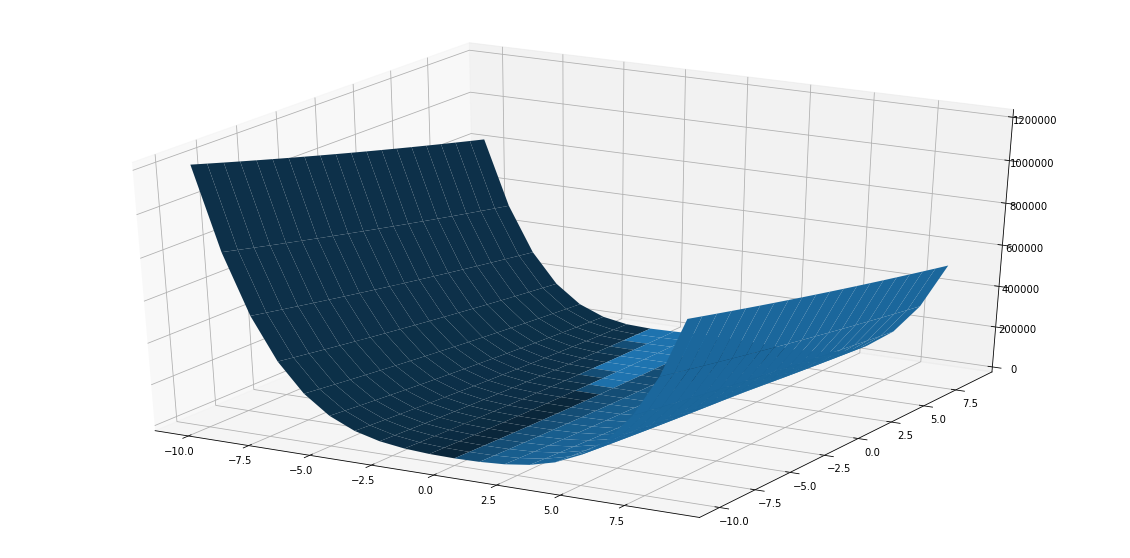

In [22]:
draw_function(x,y,f)